In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

In [34]:
data = pd.read_table('knndata.txt')

In [35]:
print(data.shape)
data.head(10) # Menampilkan 10 baris pertama dari tabel

(100, 8)


,user_id,nama,alamat,penghasilan_perbulan,status_rumah,anggota_keluarga,label_miskin,status_miskin
0,101010201,POPON,SURADE,650000,10,4,1,IYA
1,101010202,HERI,SURADE,650000,10,3,1,IYA
2,101010203,ENJANG,SURADE,1200000,10,4,1,IYA
3,101010204,AGUS SUHAEDI,SURADE,3000000,20,5,2,TIDAK
4,101010205,H. ENDIN,SURADE,5000000,30,5,2,TIDAK
5,101010206,ROJAK,SURADE,900000,10,3,1,IYA
6,101010207,HILMAN,SURADE,850000,10,4,1,IYA
7,101010208,ABAS BASRI,SURADE,800000,10,4,1,IYA
8,101010209,MANSUR AS'ARIE,SURADE,4500000,20,4,2,TIDAK
9,101010210,H. IJUD,SURADE,4500000,30,4,2,TIDAK


In [36]:
print(data.groupby('status_miskin').size())

status_miskin
IYA      42
TIDAK    58
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


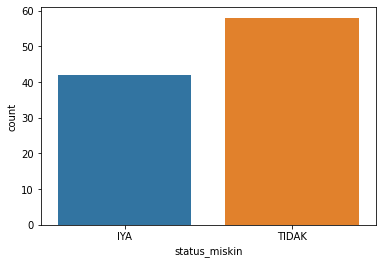

In [37]:
import seaborn as sns
sns.countplot(data['status_miskin'],label="Count")
plt.show()

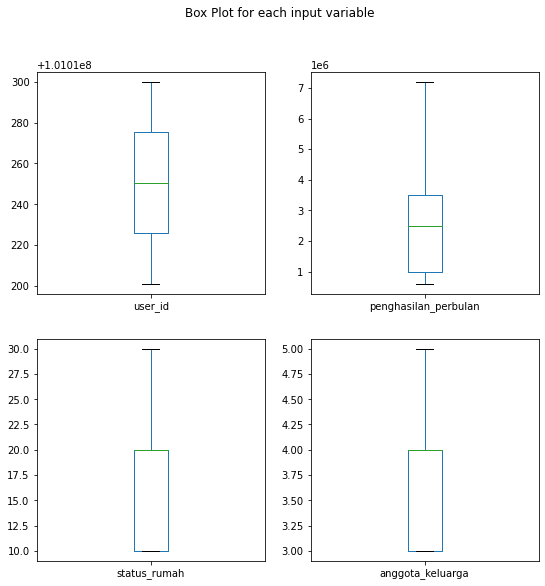

In [38]:
data.drop('label_miskin', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('data_box')
plt.show()

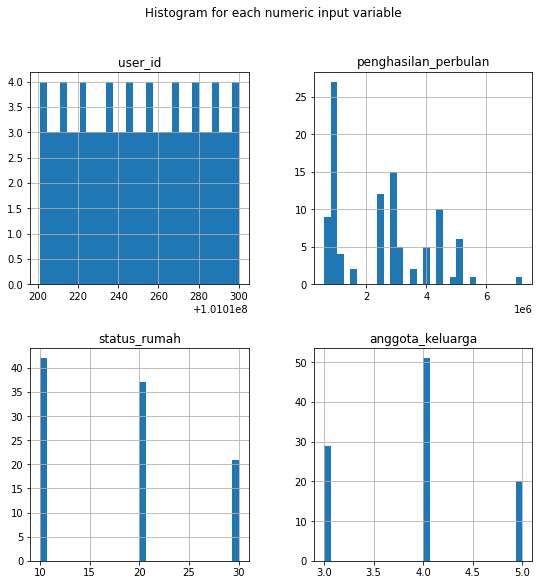

In [39]:
import pylab as pl
data.drop('label_miskin' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('data_hist')
plt.show()

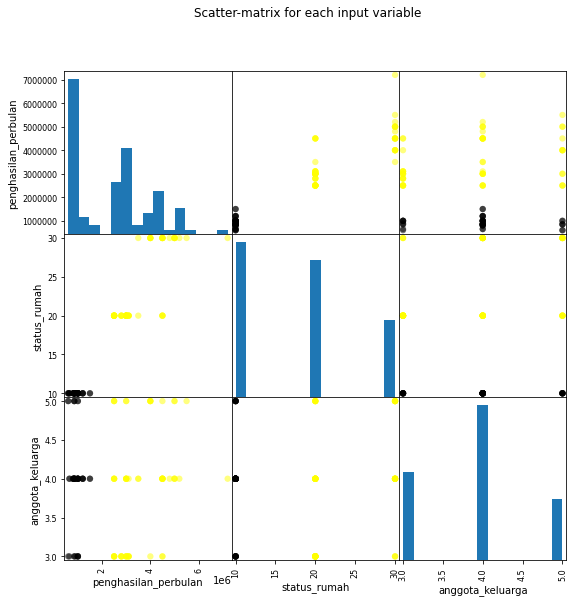

In [40]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['penghasilan_perbulan', 'status_rumah', 'anggota_keluarga']
X = data[feature_names]
y = data['label_miskin']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('data_scatter_matrix')

In [41]:
## membuat dict key pair value  antara label_zakat dengan menerima_zakat
lookup_status_miskin = dict(zip(data.label_miskin.unique(), data.status_miskin.unique()))   
print(lookup_status_miskin)

{1: 'IYA', 2: 'TIDAK'}


In [42]:
# Pada kasus ini explanatory variablenya adalah penghasilan_perbulan, status_rumah dan anggota_keluarga sedangkan target variablenya adalah label_miskin
X = data[['penghasilan_perbulan', 'status_rumah', 'anggota_keluarga']]
y = data['label_miskin']


# kita akan mensplit menjadi 80% train data and 20% test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [43]:
# Chek dimensi array dari massing masing variable
print('X_train = ', X_train.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

X_train =  (80, 3)
X_test =  (20, 3)
y_train =  (80,)
y_test =  (20,)


In [44]:
X_train.head()

,penghasilan_perbulan,status_rumah,anggota_keluarga
43,3100000,20,3
62,4000000,30,5
3,3000000,20,5
71,1000000,10,4
45,3100000,20,3


In [45]:
y_train.head()

43    2
62    2
3     2
71    1
45    2
Name: label_miskin, dtype: int64

In [46]:
X_test.head()

,penghasilan_perbulan,status_rumah,anggota_keluarga
26,5200000,30,4
86,1000000,10,4
2,1200000,10,4
55,1500000,10,4
75,2500000,20,5


In [47]:
y_test.head()

26    2
86    1
2     1
55    1
75    2
Name: label_miskin, dtype: int64

In [48]:
# Create classifier objet
knn = KNeighborsClassifier(n_neighbors = 5,
                           weights='uniform',
                           algorithm='auto',
                           metric='euclidean')

# Train the classifier using train data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
knn.score(X_test, y_test)

1.0

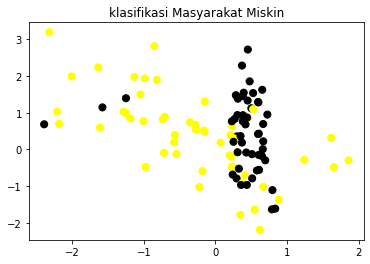

In [50]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn import neighbors
import numpy
 
def plot_masyarakat_miskin(X, y, n_neighbors, weights, X_test, y_test):
    X_mat = X 
    y_mat = y
 
    # Membuat warna map
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold  = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
 
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
 
    # Plot batas keputusan dengan menetapkan warna di peta warna
    # ke setiap titik di mesh.
    
    mesh_step_size = .01  
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                           numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])
 
    # Masukkan hasilnya ke dalam plot warna
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
    # Plot training poin
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
 
    title = "Neighbors = {}".format(n_neighbors)
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.7}, Test score = {:.7}".format(train_score, test_score)
 
    patch0 = mpatches.Patch(color='#FFFF00', label='IYA')
    patch1 = mpatches.Patch(color='#000000', label='TIDAK')
    plt.legend(handles=[patch0, patch1])
    plt.xlabel('IYA')
    plt.ylabel('TIDAK')
    plt.title(title)
    plt.show()
 
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
 
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
 

plt.figure()
plt.title('klasifikasi Masyarakat Miskin')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.2,
                                class_sep = 0.5, random_state=0)
 
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

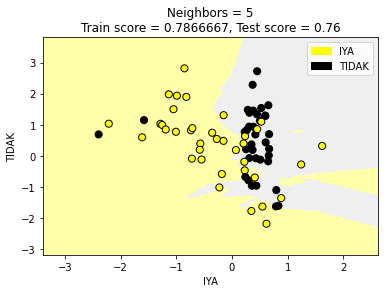

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)
 
plot_masyarakat_miskin(X_train, y_train, 5, 'uniform', X_test, y_test)

In [52]:
# prediksi masyarakat miskin dengan penghasilan_perbulan 800.000, status_rumah 10 dan angota_keluarga 4
miskin_prediction = knn.predict([[800000, 10, 4]])
lookup_status_miskin[miskin_prediction[0]]

'IYA'

In [53]:
# prediksi masyarakat miskin dengan penghasilan_perbulan 1.000.000, status_rumah 10 dan angota_keluarga 4
miskin_prediction = knn.predict([[4000000, 20, 4]])
lookup_status_miskin[miskin_prediction[0]]

'TIDAK'